# importando as lib necessárias para esse trabalho.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [15]:
# carregando o dataset
df = pd.read_csv('./treino.csv', sep=';',decimal=',')

In [16]:
df.shape

(15000, 11)

<AxesSubplot:>

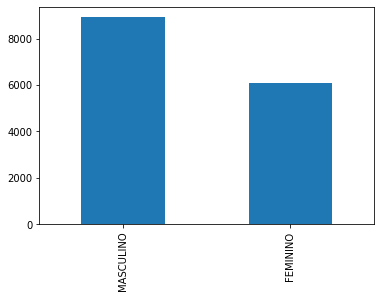

In [4]:
# os dados estão para sexo estão desbalanceados.
df.func_sexo.value_counts().plot.bar()

* o dataset possui 15mil linhas, para esse exemplo precisamos dividir a base em duas partes de forma estratificada pela coluna sexo, pois essa feature esta desbalanceada.


In [5]:
#Nesse exemplo irei utilizar a biblioteca StratifiedShuffleSplit do skealearn
#vamos importar a biblioteca
from sklearn.model_selection import StratifiedShuffleSplit

In [17]:
# Dividindo o conjunto em duas partes iguais
split = StratifiedShuffleSplit(test_size=0.5, random_state=777)

In [18]:
# com a amostra estratificada as médias das variáveis numéricas ficaram com pouca variância.
for x, y in split.split(df, df['func_sexo']):
    tr_x = df.iloc[x]
    tr_y = df.iloc[y]
print(tr_x.describe())
print('#'*65)
print(tr_y.describe())

        func_idade  contrato_horastrabalho  contrato_salario
count  7500.000000             7500.000000       7500.000000
mean     32.596000               40.448267       1957.766992
std       9.756988                9.110155       2488.573183
min      17.000000                0.000000        304.060000
25%      25.000000               44.000000       1082.205000
50%      31.000000               44.000000       1437.230000
75%      38.000000               44.000000       1936.737500
max      75.000000               44.000000      72494.210000
#################################################################
        func_idade  contrato_horastrabalho  contrato_salario
count  7500.000000             7500.000000       7500.000000
mean     32.464267               40.359200       1949.755327
std       9.681427                9.202674       2567.079252
min      16.000000                0.000000        299.400000
25%      25.000000               44.000000       1075.462500
50%      31.000000 

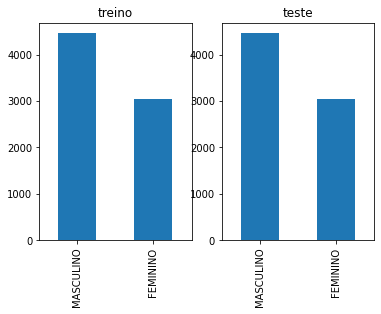

In [19]:
# visualizando os conjuntos por sexo para comparação.
t1 = tr_x.func_sexo.value_counts()
t2 = tr_y.func_sexo.value_counts()

plt.figure(1)
plt.subplot(121)
plt.title('treino')
t1.plot.bar()

plt.subplot(122)
plt.title('teste')
t2.plot.bar()
plt.show()

In [20]:
tr_x.head()

,func_sexo,func_idade,func_racacor,func_escolaridade,func_uf,func_deficiencia,empresa_porte,empresa_setor,contrato_horastrabalho,contrato_salario,turnover_apos_1_ano
5350,FEMININO,32,PRETA-PARDA,MEDIO COMPLETO,PE,NAO,DE 10 A 19,Serviços,36,1777.52,SIM
1023,MASCULINO,20,PRETA-PARDA,MEDIO COMPLETO,RN,NAO,DE 50 A 99,Indústria,44,996.08,NAO
5971,FEMININO,33,PRETA-PARDA,MEDIO COMPLETO,CE,NAO,DE 100 A 249,Comércio,44,1766.90,SIM
972,FEMININO,27,PRETA-PARDA,SUPERIOR_COMPLETO,BA,NAO,1000 OU MAIS,Serviços,36,983.24,NAO
13163,FEMININO,22,PRETA-PARDA,MEDIO COMPLETO,BA,NAO,1000 OU MAIS,Serviços,30,1382.38,NAO


* Bom agora já temos nosso conjunto de treino e de teste, vou salvar o conjunto de teste, pois ele será utilizado apenas no final.

In [21]:
# Vamos Salvar o conjunto de treino e teste
tr_y.to_csv('teste_base.csv', sep=';', decimal=',', index=False)
tr_x.to_csv('treino_base.csv',sep=';', decimal=',', index=False)

* Bom agora já temos nosso conjunto de treino e teste separados, vamos começar o trabalho.
* Irei importar o conjunto de treino e nesse momento eu não conheço mais o conjunto de teste.

In [13]:
treino = pd.read_csv('./treino_base.csv',sep=';', decimal=',')

In [14]:
treino.head()

,index,func_sexo,func_idade,func_racacor,func_escolaridade,func_uf,func_deficiencia,empresa_porte,empresa_setor,contrato_horastrabalho,contrato_salario,turnover_apos_1_ano
0,5350,FEMININO,32,PRETA-PARDA,MEDIO COMPLETO,PE,NAO,DE 10 A 19,Serviços,36,1777.52,SIM
1,1023,MASCULINO,20,PRETA-PARDA,MEDIO COMPLETO,RN,NAO,DE 50 A 99,Indústria,44,996.08,NAO
2,5971,FEMININO,33,PRETA-PARDA,MEDIO COMPLETO,CE,NAO,DE 100 A 249,Comércio,44,1766.90,SIM
3,972,FEMININO,27,PRETA-PARDA,SUPERIOR_COMPLETO,BA,NAO,1000 OU MAIS,Serviços,36,983.24,NAO
4,13163,FEMININO,22,PRETA-PARDA,MEDIO COMPLETO,BA,NAO,1000 OU MAIS,Serviços,30,1382.38,NAO


# Para esse estudo irei utilizar uma biblioteca muito poderosa de automl(Pycart)

In [14]:
#Importando as lib necessárias para o projeto.
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from pandas_profiling import ProfileReport
from pycaret.classification import *
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from pycaret.utils import check_metric
%matplotlib inline
import seaborn as sns

In [73]:
#Criando um setup basico do pycaret para comparação:
basic = setup(data=treino,
              target='turnover_apos_1_ano',
              session_id=777,              
              normalize=True,
              normalize_method='minmax',
              profile=True,
              html=True
             )
    

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# vamos tratar esses dados:
* Não temos valores ausentes.
* Maior idade maior idade maior salário.
* Empresa_porte e func_escolaridade seguem uma ordem (vamos ordenar).
* func_deficiencia está muito desbalanceado (ignorar essa feature).
* remover outliers.
* Classe sexo está desbalanceada.
* Precisamos tratar contrato horas trabalhadas pois possuem valores com 0.(dividir em duas classes: temp e fixo).

In [15]:
ord_dic ={'func_escolaridade':[
                            "ANALFABETO-FUND_INCOMPLETO"
                           ,"FUND_COMPLETO-MEDIO_INCOMPLETO"
                           ,"MEDIO COMPLETO"
                           ,"SUPERIOR_INCOMPLETO"
                           ,"SUPERIOR_COMPLETO"                                              
                          ],
          'empresa_porte':
                          [ "ATE 4"
                           ,"DE 5 A 9"
                           ,"DE 10 A 19"
                           ,"DE 20 A 49"
                           ,"DE 50 A 99"
                           ,"DE 100 A 249"
                           ,"DE 250 A 499"
                           ,"DE 500 A 999"
                           ,"1000 OU MAIS"
                          ]
         }

In [16]:
#Criando um setup basico do pycaret para comparação:
model_01 = setup(    data=treino,
                      target='turnover_apos_1_ano',
                      session_id=777,
                      ordinal_features=ord_dic,
                      ignore_features=['func_deficiencia'], # ignore func_def.
                      normalize=True,
                      normalize_method='minmax',
                      transformation= True,
                      transformation_method= 'quantile',
                      remove_outliers=True,
                      outliers_threshold=0.05,
                      silent=True,
                      verbose=False,
                      #profile=True,
                      html=True
             )

In [17]:
#Compara todos os modelos e seleciona os 5 melhores pelo f1 score.
five_best_models = compare_models(sort = 'F1', n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8327,0.9099,0.8696,0.7263,0.7913,0.6537,0.6614,0.0830
lightgbm,Light Gradient Boosting Machine,0.8351,0.9122,0.8317,0.7458,0.7860,0.6526,0.6557,0.0430
rf,Random Forest Classifier,0.8311,0.9075,0.8047,0.7510,0.7768,0.6413,0.6425,0.1680
ada,Ada Boost Classifier,0.8207,0.8952,0.8465,0.7147,0.7748,0.6276,0.6342,0.0470
dt,Decision Tree Classifier,0.7852,0.7673,0.7014,0.7074,0.7039,0.5355,0.5359,0.0080
lr,Logistic Regression,0.7898,0.8664,0.6683,0.7329,0.6987,0.5379,0.5396,6.9450
et,Extra Trees Classifier,0.7874,0.8698,0.6678,0.7275,0.6961,0.5331,0.5345,0.1640
lda,Linear Discriminant Analysis,0.7852,0.8661,0.6584,0.7276,0.6908,0.5269,0.5289,0.0160
ridge,Ridge Classifier,0.7824,0.0000,0.6457,0.7280,0.6839,0.5190,0.5215,0.0080
nb,Naive Bayes,0.7369,0.7984,0.7618,0.6118,0.6785,0.4602,0.4684,2.1730


In [18]:
#conjunto de treino transformado.
get_config("X_train").head()

,func_idade,func_escolaridade,empresa_porte,contrato_horastrabalho,contrato_salario,func_sexo_MASCULINO,func_racacor_AMARELA-BRANCA,func_racacor_PRETA-PARDA,func_racacor_SEM INFO,func_uf_AL,...,func_uf_PB,func_uf_PE,func_uf_PI,func_uf_RN,func_uf_SE,empresa_setor_Agricultura,empresa_setor_Comércio,empresa_setor_Construçao civil,empresa_setor_Indústria,empresa_setor_Serviços
7430,-1.453280,2.0,2.0,-1.959536,-2.117873,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6145,0.783330,4.0,6.0,5.199337,1.260466,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
577,-0.532190,2.0,2.0,5.199337,-0.113969,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1746,-0.678433,2.0,1.0,5.199337,-1.289039,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6002,-0.062770,4.0,2.0,5.199337,-0.230974,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
# Tunagem dos 5 melhores.
melhores_tunados = []
for i in range(len(five_best_models)):
    melhores_tunados.append(tune_model(five_best_models[i], optimize = 'F1'))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8317,0.8494,0.8956,0.7149,0.7951,0.6553,0.6673
1,0.8156,0.8373,0.9121,0.6860,0.7830,0.6282,0.6476
2,0.8437,0.8689,0.9451,0.7167,0.8152,0.6841,0.7038
3,0.8096,0.8479,0.9341,0.6719,0.7816,0.6207,0.6472
4,0.7715,0.8041,0.8846,0.6339,0.7385,0.5453,0.5693
5,0.8176,0.8473,0.9066,0.6904,0.7838,0.6311,0.6486
6,0.7791,0.8033,0.8564,0.6485,0.7381,0.5533,0.5693
7,0.8112,0.8387,0.9171,0.6776,0.7793,0.6208,0.6426
8,0.8353,0.8567,0.9286,0.7101,0.8048,0.6667,0.6847
9,0.8052,0.8381,0.8736,0.6824,0.7663,0.6036,0.6171


In [20]:
#combinação soft dos 5 melhores tunados.
combinacao_soft = blend_models(melhores_tunados, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8437,0.9238,0.8956,0.7342,0.8069,0.6778,0.6872
1,0.8257,0.8997,0.9011,0.7039,0.7904,0.6450,0.6594
2,0.8537,0.9274,0.9231,0.7401,0.8215,0.7001,0.7124
3,0.8257,0.9299,0.9396,0.6923,0.7972,0.6504,0.6737
4,0.7876,0.8900,0.8681,0.6583,0.7488,0.5707,0.5872
5,0.8297,0.9093,0.9011,0.7100,0.7942,0.6523,0.6659
6,0.7851,0.8767,0.8453,0.6595,0.7409,0.5621,0.5748
7,0.8313,0.9007,0.9282,0.7029,0.8000,0.6589,0.6780
8,0.8414,0.9156,0.9176,0.7229,0.8087,0.6764,0.6905
9,0.8153,0.8984,0.8736,0.6974,0.7756,0.6219,0.6334


In [21]:
# resultado da combinação no conjunto de teste.
predict_model(combinacao_soft)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8165,0.9050,0.8918,0.6905,0.7783,0.6261,0.6410


,func_idade,func_escolaridade,empresa_porte,contrato_horastrabalho,contrato_salario,func_sexo_MASCULINO,func_racacor_AMARELA-BRANCA,func_racacor_PRETA-PARDA,func_racacor_SEM INFO,func_uf_AL,...,func_uf_RN,func_uf_SE,empresa_setor_Agricultura,empresa_setor_Comércio,empresa_setor_Construçao civil,empresa_setor_Indústria,empresa_setor_Serviços,turnover_apos_1_ano,Label,Score
0,0.153660,4.0,2.0,-1.588771,0.515372,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,SIM,SIM,0.6237
1,-0.532190,2.0,5.0,5.199337,-1.013007,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NAO,NAO,0.8956
2,0.783330,2.0,6.0,-1.128144,-0.708548,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NAO,NAO,0.8766
3,-0.175278,4.0,5.0,5.199337,1.186202,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,SIM,SIM,0.5880
4,1.509656,4.0,4.0,-1.792374,-0.184437,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,SIM,NAO,0.6458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2246,-1.025123,0.0,7.0,5.199337,-0.585876,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NAO,NAO,0.8959
2247,-0.532190,2.0,7.0,5.199337,0.453760,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,SIM,SIM,0.7579
2248,0.607463,3.0,1.0,5.199337,-0.581935,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NAO,NAO,0.8957
2249,0.253606,2.0,6.0,-0.785036,-0.078641,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NAO,NAO,0.8124


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


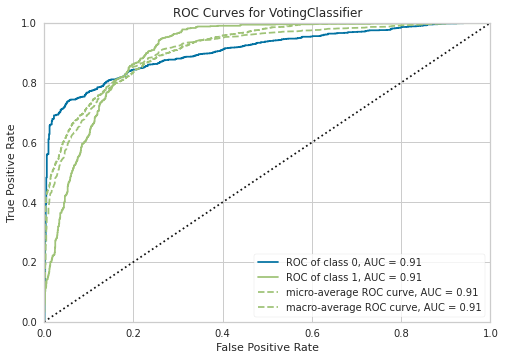

In [22]:
plot_model(combinacao_soft)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


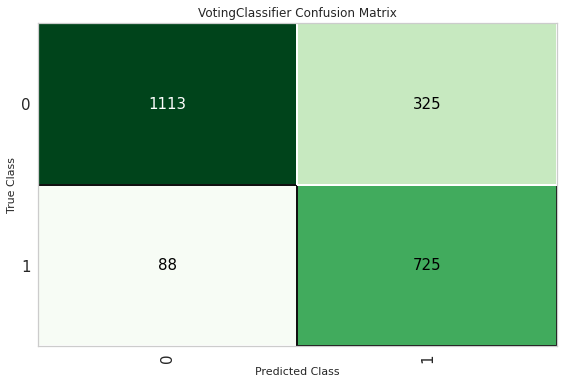

In [23]:
plot_model(combinacao_soft, plot = 'confusion_matrix')

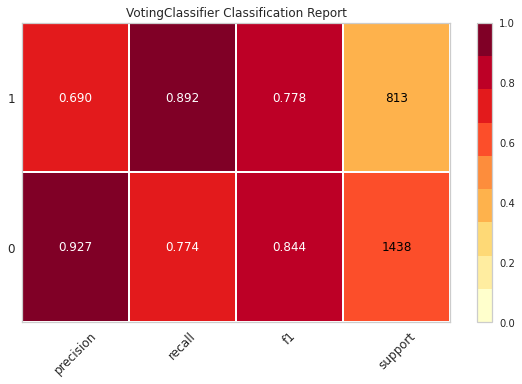

In [24]:
plot_model(combinacao_soft, plot='class_report')

* A combinação soft ficou razoavemente boa, vamos utilizar esse modelo para o nosso projeto.
* Lembrando que em um projeto real, certamente iriamos gastar muito tempo durante todo esse processo, estou apenas criando um modelo basico para nossa demonstração será mais do que o suficiente.

In [25]:
# realizando o previsão do conjunto de treino completo.
val_pred = predict_model(combinacao_soft, data=treino)

In [26]:
# f1 score com o conjunto de treino completo.
check_metric(val_pred['turnover_apos_1_ano'], val_pred['Label'], metric = 'F1')

0.7887

In [27]:
# precision com o conjunto de treino completo.
check_metric(val_pred['turnover_apos_1_ano'], val_pred['Label'], metric = 'Precision')

0.7023

In [28]:
check_metric(val_pred['turnover_apos_1_ano'], val_pred['Label'], metric = 'Recall')

0.8993

* O modelo está se saindo muito bem, poderiamos tratar a feature sexo que esta desbalanceada, certamente conseguiriamos melhorar ainda mais o modelo, mas por hora deixar dessa forma assim podemos dar margem para melhoras futuras.

In [29]:
#Salvando o modelo
save_model(combinacao_soft, 'comb_soft_model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False,
                                       features_todrop=['index',
                                                        'func_deficiencia'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='turnover_apos_1_ano',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None...
                                                                       class_weight=None,
                                                                       criterion='gini',
                            